In [12]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import kerastuner as kt
from sklearn.model_selection import train_test_split

def plot_curve(epochs, hist, list_of_metrics,name):
    """Plot a curve of one or more classification metrics vs. epoch."""  
    plt.figure()
    plt.xlabel("Epoch "+name)
    plt.ylabel("Value")

    for m in list_of_metrics:
        x = hist[m]
        plt.plot(epochs[1:], x[1:], label=m)
    plt.legend()
    
    
# for activation functions check https://keras.io/api/layers/activations/
def create_model2(my_learning_rate,momentum,layers, my_feature_layer,my_metrics,my_act_function = "softmax"):
    model = tf.keras.models.Sequential()
    #model.add(my_feature_layer)

    for layer in layers:
        model.add(tf.keras.layers.Dense(units = layer, activation = my_act_function))
    model.add(tf.keras.layers.Dense(units=8,name='Output', activation = 'relu'))                             
    model.compile(optimizer=tf.keras.optimizers.SGD(lr=my_learning_rate,momentum=momentum),                                       
                loss=tf.keras.losses.MeanAbsoluteError(),
                metrics=my_metrics)
    return model


def train_model(model,x_data, df_label, epochs, label_name,
                batch_size=None,shuffle=True):
    #features = {name:np.array(value) for name, value in dataset.items()}
    label=df_label[label_name].to_numpy()
    history = model.fit(x=x_data, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=shuffle,validation_split=0.2,
                       callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)])
  
    epochs = history.epoch
    hist = pd.DataFrame(history.history)
    return epochs, hist
    
    
#returns dataframe
def test_model(model,x_data, df_label ,label_name):
    #features = {name:np.array(value) for name, value in dataset.items()}
    label=df_label[label_name].to_numpy()
   # print(label)
    evaluation=model.evaluate(x = x_data, y = label, batch_size=batch_size)
    predicted = model.predict(x_data)
    
    df_test=pd.DataFrame(label,columns=[label_name])
   # print(predicted)
    df_predict=pd.DataFrame(predicted,columns=[label+"_pred" for label in label_name])
    return pd.concat([df_test,df_predict], axis=1)






In [13]:
#G:\OneDrive - bwedu\Master\Forschungspraktikum\Inga\pc-forschi\generated_Data
all_data=pd.read_csv("G:\OneDrive - bwedu\Master\Forschungspraktikum\Inga\pc-forschi\generated_Data/all_param_4_values_complete.csv")

all_label_list=["k6a1","k6a2","k11","k12","k9a1","k9a2","delta","lambda"]
all_features_list=["all_maxima","Intensity"]

#print(df_complete["all_maxima"].values[10])


all_maxima_array=np.asarray([  np.asarray([x for x in row.replace("[","").replace("]","").replace("  "," ",5).replace(" ",";").split(";") if x!=""],dtype=np.float64)     for row in all_data["all_maxima"] ])
intensity_array=np.asarray([  np.asarray([x for x in row.replace("[","").replace("]","").replace("  "," ",5).replace(" ",";").split(";") if x!=""],dtype=np.float64)     for row in all_data["Intensity"] ])
max_nr_of_peaks=max([len(i) for i in all_maxima_array])

all_maxima_array_padded=np.zeros((all_maxima_array.shape[0],max_nr_of_peaks))
#intensity_array_padded=np.zeros((intensity_array.shape[0],max_nr_of_peaks*))

print(all_maxima_array_padded.shape)
for i in range(len(all_maxima_array)):
    for j in range(len(all_maxima_array[i])):
        all_maxima_array_padded[i][j]=all_maxima_array[i][j]
       # all_maxima_array_padded[i][j+7]=intensity_array[i][j]

        
        
#print(all_maxima_array_padded)  
df_label=all_data[all_label_list]


x_train, x_test,y_train,y_test = train_test_split( all_maxima_array_padded, df_label  ,test_size=0.20, random_state=42)


(65464, 7)


In [14]:
feature_columns_A = []
main_maximum = tf.feature_column.numeric_column("main_maximum")
feature_columns_A.append(main_maximum)
no_of_max = tf.feature_column.numeric_column("no_of_max")
feature_columns_A.append(no_of_max)

my_feature_layer_A = tf.keras.layers.DenseFeatures(feature_columns_A)

In [15]:
learning_rate = 1e-2
momentum=0.7
epochs = 100
batch_size = 150

#specify the classification threshold
classification_threshold = 0.15

# Establish the metrics the model will measure.
metric = [tf.keras.metrics.MeanAbsoluteError()]
layers=[16,256,2048,64,16]




my_model= create_model2(learning_rate,momentum,layers, my_feature_layer_A,metric,my_act_function="relu")

#lambda_train, lambda_test
#delta_train, delta_test

epochs_run, hist = train_model(my_model,x_train, y_train, epochs, 
                          all_label_list, batch_size)


Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

280/280 [==============================] - ETA: 0s - loss: 0.1450 - mean_absolute_error: 0.145 - ETA: 1s - loss: 0.1378 - mean_absolute_error: 0.137 - ETA: 1s - loss: 0.1279 - mean_absolute_error: 0.127 - ETA: 1s - loss: 0.1188 - mean_absolute_error: 0.118 - ETA: 1s - loss: 0.1101 - mean_absolute_error: 0.110 - ETA: 1s - loss: 0.1028 - mean_absolute_error: 0.102 - ETA: 1s - loss: 0.0979 - mean_absolute_error: 0.097 - ETA: 1s - loss: 0.0947 - mean_absolute_error: 0.094 - ETA: 1s - loss: 0.092

Epoch 5/100
280/280 [==============================] - ETA: 0s - loss: 0.0734 - mean_absolute_error: 0.073 - ETA: 1s - loss: 0.0711 - mean_absolute_error: 0.071 - ETA: 1s - loss: 0.0711 - mean_absolute_error: 0.071 - ETA: 1s - loss: 0.0710 - mean_absolute_error: 0.071 - ETA: 1s - loss: 0.0710 - mean_absolute_error: 0.071 - ETA: 1s - loss: 0.0712 - mean_absolute_error: 0.071 - ETA: 1s - loss: 0.0712 - mean_absolute_error: 0.071 - ETA: 1s - loss: 0.0712 - mean_absolute_error: 0.071 - ETA: 1s - loss: 0.0712 - mean_absolute_error: 0.071 - ETA: 1s - loss: 0.0711 - mean_absolute_error: 0.071 - ETA: 1s - loss: 0.0711 - mean_absolute_error: 0.071 - ETA: 1s - loss: 0.0712 - mean_absolute_error: 0.071 - ETA: 0s - loss: 0.0712 - mean_absolute_error: 0.071 - ETA: 0s - loss: 0.0712 - mean_absolute_error: 0.071 - ETA: 0s - loss: 0.0712 - mean_absolute_error: 0.071 - ETA: 0s - loss: 0.0712 - mean_absolute_error: 0.071 - ETA: 0s - loss: 0.0712 - mean_absolute_error: 0.071 - ETA: 0s - loss: 0.0712 - me

280/280 [==============================] - ETA: 0s - loss: 0.0654 - mean_absolute_error: 0.065 - ETA: 1s - loss: 0.0671 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0671 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0673 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0673 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0673 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0675 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0676 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0675 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0675 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0675 - mean_absolute_error: 0.067 - ETA: 0s - loss: 0.0675 - mean_absolute_error: 0.067 - ETA: 0s - loss: 0.0675 - mean_absolute_error: 0.067 - ETA: 0s - loss: 0.0675 - mean_absolute_error: 0.067 - ETA: 0s - loss: 0.0675 - mean_absolute_error: 0.067 - ETA: 0s - loss: 0.0675 - mean_absolute_error: 0.067 - ETA: 0s - loss: 0.0675 - mean_absolute_error: 0.067 - ETA: 0s - loss: 0.0675 - mean_absolute_

280/280 [==============================] - ETA: 0s - loss: 0.0690 - mean_absolute_error: 0.069 - ETA: 1s - loss: 0.0667 - mean_absolute_error: 0.066 - ETA: 1s - loss: 0.0668 - mean_absolute_error: 0.066 - ETA: 1s - loss: 0.0670 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0670 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0671 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0672 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0672 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0671 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0672 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0672 - mean_absolute_error: 0.067 - ETA: 0s - loss: 0.0672 - mean_absolute_error: 0.067 - ETA: 0s - loss: 0.0673 - mean_absolute_error: 0.067 - ETA: 0s - loss: 0.0673 - mean_absolute_error: 0.067 - ETA: 0s - loss: 0.0673 - mean_absolute_error: 0.067 - ETA: 0s - loss: 0.0673 - mean_absolute_error: 0.067 - ETA: 0s - loss: 0.0672 - mean_absolute_error: 0.067 - ETA: 0s - loss: 0.0673 - mean_absolute_

280/280 [==============================] - ETA: 0s - loss: 0.0672 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0670 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0671 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0672 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0673 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0673 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0672 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0672 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0672 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0672 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0671 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0671 - mean_absolute_error: 0.067 - ETA: 0s - loss: 0.0672 - mean_absolute_error: 0.067 - ETA: 0s - loss: 0.0672 - mean_absolute_error: 0.067 - ETA: 0s - loss: 0.0672 - mean_absolute_error: 0.067 - ETA: 0s - loss: 0.0671 - mean_absolute_error: 0.067 - ETA: 0s - loss: 0.0671 - mean_absolute_error: 0.067 - ETA: 0s - loss: 0.0671 - mean_absolute_

280/280 [==============================] - ETA: 0s - loss: 0.0676 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0671 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0670 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0670 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0671 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0671 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0671 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0670 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0670 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0670 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0671 - mean_absolute_error: 0.067 - ETA: 0s - loss: 0.0671 - mean_absolute_error: 0.067 - ETA: 0s - loss: 0.0670 - mean_absolute_error: 0.067 - ETA: 0s - loss: 0.0671 - mean_absolute_error: 0.067 - ETA: 0s - loss: 0.0671 - mean_absolute_error: 0.067 - ETA: 0s - loss: 0.0671 - mean_absolute_error: 0.067 - ETA: 0s - loss: 0.0671 - mean_absolute_error: 0.067 - ETA: 0s - loss: 0.0671 - mean_absolute_

280/280 [==============================] - ETA: 0s - loss: 0.0678 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0670 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0670 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0672 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0670 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0669 - mean_absolute_error: 0.066 - ETA: 1s - loss: 0.0670 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0671 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0672 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0671 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0672 - mean_absolute_error: 0.067 - ETA: 0s - loss: 0.0672 - mean_absolute_error: 0.067 - ETA: 0s - loss: 0.0672 - mean_absolute_error: 0.067 - ETA: 0s - loss: 0.0672 - mean_absolute_error: 0.067 - ETA: 0s - loss: 0.0672 - mean_absolute_error: 0.067 - ETA: 0s - loss: 0.0672 - mean_absolute_error: 0.067 - ETA: 0s - loss: 0.0672 - mean_absolute_error: 0.067 - ETA: 0s - loss: 0.0672 - mean_absolute_

280/280 [==============================] - ETA: 0s - loss: 0.0654 - mean_absolute_error: 0.065 - ETA: 1s - loss: 0.0672 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0675 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0673 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0672 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0672 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0671 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0671 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0671 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0671 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0671 - mean_absolute_error: 0.067 - ETA: 0s - loss: 0.0671 - mean_absolute_error: 0.067 - ETA: 0s - loss: 0.0671 - mean_absolute_error: 0.067 - ETA: 0s - loss: 0.0671 - mean_absolute_error: 0.067 - ETA: 0s - loss: 0.0671 - mean_absolute_error: 0.067 - ETA: 0s - loss: 0.0671 - mean_absolute_error: 0.067 - ETA: 0s - loss: 0.0671 - mean_absolute_error: 0.067 - ETA: 0s - loss: 0.0671 - mean_absolute_

280/280 [==============================] - ETA: 0s - loss: 0.0673 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0669 - mean_absolute_error: 0.066 - ETA: 1s - loss: 0.0671 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0670 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0669 - mean_absolute_error: 0.066 - ETA: 1s - loss: 0.0669 - mean_absolute_error: 0.066 - ETA: 1s - loss: 0.0670 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0670 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0669 - mean_absolute_error: 0.066 - ETA: 1s - loss: 0.0670 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0670 - mean_absolute_error: 0.067 - ETA: 0s - loss: 0.0670 - mean_absolute_error: 0.067 - ETA: 0s - loss: 0.0670 - mean_absolute_error: 0.067 - ETA: 0s - loss: 0.0671 - mean_absolute_error: 0.067 - ETA: 0s - loss: 0.0670 - mean_absolute_error: 0.067 - ETA: 0s - loss: 0.0671 - mean_absolute_error: 0.067 - ETA: 0s - loss: 0.0671 - mean_absolute_error: 0.067 - ETA: 0s - loss: 0.0670 - mean_absolute_

280/280 [==============================] - ETA: 0s - loss: 0.0677 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0666 - mean_absolute_error: 0.066 - ETA: 1s - loss: 0.0668 - mean_absolute_error: 0.066 - ETA: 1s - loss: 0.0667 - mean_absolute_error: 0.066 - ETA: 1s - loss: 0.0668 - mean_absolute_error: 0.066 - ETA: 1s - loss: 0.0668 - mean_absolute_error: 0.066 - ETA: 1s - loss: 0.0668 - mean_absolute_error: 0.066 - ETA: 1s - loss: 0.0668 - mean_absolute_error: 0.066 - ETA: 1s - loss: 0.0669 - mean_absolute_error: 0.066 - ETA: 1s - loss: 0.0669 - mean_absolute_error: 0.066 - ETA: 1s - loss: 0.0669 - mean_absolute_error: 0.066 - ETA: 1s - loss: 0.0669 - mean_absolute_error: 0.066 - ETA: 0s - loss: 0.0669 - mean_absolute_error: 0.066 - ETA: 0s - loss: 0.0669 - mean_absolute_error: 0.066 - ETA: 0s - loss: 0.0670 - mean_absolute_error: 0.067 - ETA: 0s - loss: 0.0669 - mean_absolute_error: 0.066 - ETA: 0s - loss: 0.0669 - mean_absolute_error: 0.066 - ETA: 0s - loss: 0.0669 - mean_absolute_

280/280 [==============================] - ETA: 0s - loss: 0.0652 - mean_absolute_error: 0.065 - ETA: 1s - loss: 0.0670 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0671 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0673 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0673 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0673 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0673 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0671 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0671 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0672 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0671 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0671 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0671 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0671 - mean_absolute_error: 0.067 - ETA: 0s - loss: 0.0670 - mean_absolute_error: 0.067 - ETA: 0s - loss: 0.0670 - mean_absolute_error: 0.067 - ETA: 0s - loss: 0.0670 - mean_absolute_error: 0.067 - ETA: 0s - loss: 0.0671 - mean_absolute_

280/280 [==============================] - ETA: 0s - loss: 0.0680 - mean_absolute_error: 0.068 - ETA: 1s - loss: 0.0677 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0674 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0673 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0672 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0672 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0672 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0672 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0671 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0671 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0671 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0671 - mean_absolute_error: 0.067 - ETA: 0s - loss: 0.0670 - mean_absolute_error: 0.067 - ETA: 0s - loss: 0.0670 - mean_absolute_error: 0.067 - ETA: 0s - loss: 0.0670 - mean_absolute_error: 0.067 - ETA: 0s - loss: 0.0670 - mean_absolute_error: 0.067 - ETA: 0s - loss: 0.0671 - mean_absolute_error: 0.067 - ETA: 0s - loss: 0.0670 - mean_absolute_

280/280 [==============================] - ETA: 0s - loss: 0.0678 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0669 - mean_absolute_error: 0.066 - ETA: 1s - loss: 0.0667 - mean_absolute_error: 0.066 - ETA: 1s - loss: 0.0669 - mean_absolute_error: 0.066 - ETA: 1s - loss: 0.0670 - mean_absolute_error: 0.067 - ETA: 1s - loss: 0.0669 - mean_absolute_error: 0.066 - ETA: 1s - loss: 0.0668 - mean_absolute_error: 0.066 - ETA: 1s - loss: 0.0668 - mean_absolute_error: 0.066 - ETA: 1s - loss: 0.0668 - mean_absolute_error: 0.066 - ETA: 1s - loss: 0.0668 - mean_absolute_error: 0.066 - ETA: 1s - loss: 0.0669 - mean_absolute_error: 0.066 - ETA: 1s - loss: 0.0669 - mean_absolute_error: 0.066 - ETA: 0s - loss: 0.0669 - mean_absolute_error: 0.066 - ETA: 0s - loss: 0.0669 - mean_absolute_error: 0.066 - ETA: 0s - loss: 0.0669 - mean_absolute_error: 0.066 - ETA: 0s - loss: 0.0669 - mean_absolute_error: 0.066 - ETA: 0s - loss: 0.0669 - mean_absolute_error: 0.066 - ETA: 0s - loss: 0.0669 - mean_absolute_

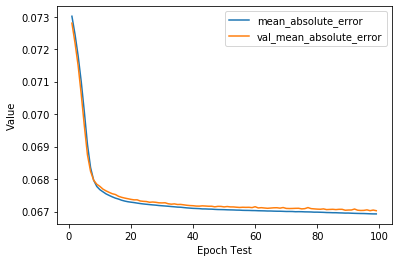

In [16]:
# Plot a graph of the metric(s) vs. epochs.
#list_of_metrics_to_plot = ['accuracy'] 
#print(hist_delta.head())
list_of_metrics_to_plot = ['mean_absolute_error',"val_mean_absolute_error"] 
plot_curve(epochs_run, hist, list_of_metrics_to_plot,"Test")


In [17]:
delta_test_result=test_model(my_model,x_test,y_test,all_label_list)
delta_test_result.head(50)

88/88 [==============================] - ETA: 0s - loss: 0.0657 - mean_absolute_error: 0.065 - ETA: 0s - loss: 0.0669 - mean_absolute_error: 0.066 - ETA: 0s - loss: 0.0671 - mean_absolute_error: 0.067 - ETA: 0s - loss: 0.0669 - mean_absolute_error: 0.066 - 0s 2ms/step - loss: 0.0669 - mean_absolute_error: 0.0669


,"(k6a1,)","(k6a2,)","(k11,)","(k12,)","(k9a1,)","(k9a2,)","(delta,)","(lambda,)",k6a1_pred,k6a2_pred,k11_pred,k12_pred,k9a1_pred,k9a2_pred,delta_pred,lambda_pred
0,-0.0333,-0.0333,0.1000,-0.1000,-0.0333,-0.0333,0.4667,0.5000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.491036,0.385998
1,-0.0333,-0.0333,-0.0333,0.1000,-0.1000,-0.0333,0.6000,0.5000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.609849,0.429785
2,0.1000,-0.0333,0.0333,0.0333,-0.1000,-0.0333,0.6000,0.5000,0.018497,0.000000,0.000000,0.0,0.0,0.0,0.616637,0.386390
3,0.0333,-0.0333,0.0333,-0.0333,0.1000,0.0333,0.4667,0.3667,0.029474,0.000000,0.000000,0.0,0.0,0.0,0.487260,0.268354
4,-0.0333,-0.0333,-0.1000,-0.0333,0.0333,0.0333,0.5333,0.3667,0.025799,0.000000,0.000000,0.0,0.0,0.0,0.540803,0.315821
5,-0.0333,0.0333,-0.0333,-0.1000,0.1000,-0.1000,0.4000,0.1000,0.016572,0.006605,0.000000,0.0,0.0,0.0,0.381219,0.162248
6,0.1000,-0.1000,-0.0333,0.0333,-0.0333,-0.0333,0.4667,0.5000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.524104,0.306387
7,0.1000,0.0333,0.1000,0.1000,0.0333,-0.1000,0.4000,0.3667,0.004659,0.000000,0.000000,0.0,0.0,0.0,0.421806,0.207314
8,-0.0333,0.0333,0.1000,0.1000,0.1000,0.1000,0.4000,0.2333,0.012198,0.000000,0.000000,0.0,0.0,0.0,0.396103,0.178726
9,-0.0333,-0.0333,0.1000,-0.1000,0.1000,0.0333,0.4667,0.5000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.537581,0.321644


NameError: name 'my_model' is not defined